In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
#import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import stats
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [2]:
data = pd.read_csv(r'F:\amruth\norm_price.csv', encoding = 'iso-8859-1')
data.sample(3)

,purchase_price_1,living_space_in_m2,number_of_rooms_1,floor_1,contruction_year_1,lat,lon,pickup cluster,Attikawohnungen,Dachgeschosswohnungen,...,Lofts,Maisonettes,Penthouse,RohdachbÃ¶den,Terrassenwohnungen,Wohnungen,terrasse_1,balkon_1,garten_1,Aufzug_1
19637,359000.0,58.130,2.0,5.0,2020,0.917282,0.234722,2,0,0,...,0,0,0,0,0,0,1,1,0,1
16284,319000.0,68.054,2.4,2.0,1944,0.916579,0.235017,2,0,0,...,0,0,0,0,0,1,0,0,0,0
25143,380000.0,50.166,2.0,3.6,1928,0.915992,0.232633,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data.iloc[:, 1:]
y = data[['purchase_price_1']]
X.columns

Index(['living_space_in_m2', 'number_of_rooms_1', 'floor_1',
       'contruction_year_1', 'lat', 'lon', 'pickup cluster',
       'Attikawohnungen ', 'Dachgeschosswohnungen', 'Erdgeschosswohnungen',
       'Etagenwohnungen', 'Lofts', 'Maisonettes', 'Penthouse', 'RohdachbÃ¶den',
       'Terrassenwohnungen', 'Wohnungen', 'terrasse_1', 'balkon_1', 'garten_1',
       'Aufzug_1'],
      dtype='object')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)
X_train.shape, y_train.shape, X_test.shape

((27327, 21), (27327, 1), (277, 21))

In [5]:
tf.random.set_seed(68)
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    tf.keras.layers.Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu'),
    #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1)),
    tf.keras.layers.LSTM(128, return_sequences = True),
    tf.keras.layers.LSTM(64, return_sequences = True),
    tf.keras.layers.SimpleRNN(80, return_sequences = True),
    tf.keras.layers.SimpleRNN(40),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(20,activation = 'relu'),
    tf.keras.layers.Dense(1)])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epochs: 1e-5 * 10**(epochs / 20))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

In [ ]:
history=model.fit(X_train,y_train, validation_data = (X_test, y_test), 
                batch_size = 256, epochs=100, callbacks = [lr_schedule])


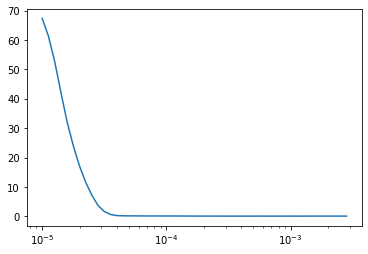

In [7]:
lrs = 1e-5 * (10 ** (np.arange(50) / 20))
plt.semilogx(lrs, history.history["loss"])


In [8]:
tf.random.set_seed(0)
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    tf.keras.layers.Conv1D(filters = 32, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu'),
    #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1)),
    tf.keras.layers.LSTM(32, return_sequences = True),
    tf.keras.layers.LSTM(16),
    #tf.keras.layers.SimpleRNN(40, return_sequences = True),
    #tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5,activation = 'relu'),
    tf.keras.layers.Dense(1)])
model1.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(learning_rate = 5e-5), metrics = ['mae'])
history1 = model1.fit(X_train,y_train, validation_data = (X_test, y_test), epochs=100, batch_size = 64)

Train on 12424 samples, validate on 319 samples
Epoch 1/100
12424/12424 [==============================] - 3s 253us/sample - loss: 64.1464 - mae: 7.9943 - val_loss: 56.4359 - val_mae: 7.4985
Epoch 2/100
12424/12424 [==============================] - 2s 185us/sample - loss: 46.8545 - mae: 6.8192 - val_loss: 36.3683 - val_mae: 6.0134
Epoch 3/100
12424/12424 [==============================] - 2s 186us/sample - loss: 29.4815 - mae: 5.4011 - val_loss: 22.8278 - val_mae: 4.7550
Epoch 4/100
12424/12424 [==============================] - 2s 191us/sample - loss: 18.3071 - mae: 4.2445 - val_loss: 13.7061 - val_mae: 3.6714
Epoch 5/100
12424/12424 [==============================] - 2s 192us/sample - loss: 10.9034 - mae: 3.2620 - val_loss: 8.0397 - val_mae: 2.7942
Epoch 6/100
12424/12424 [==============================] - 3s 216us/sample - loss: 6.2774 - mae: 2.4534 - val_loss: 4.4268 - val_mae: 2.0499
Epoch 7/100
12424/12424 [==============================] - 3s 235us/sample - loss: 3.3446 - mae: 

In [9]:
predictions = model1.predict(X_test)
predictions[:5], y_test.to_numpy()[:5]

(array([[8.593707],
        [8.417801],
        [8.381887],
        [7.864384],
        [7.711547]], dtype=float32),
 array([[8.54500289],
        [8.37047041],
        [8.69484149],
        [7.71760729],
        [7.7403941 ]]))

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(predictions, y_test), mean_absolute_error(predictions, y_test)

(0.10117423587019198, 0.23267485336582064)

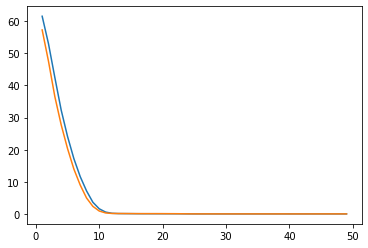

In [11]:
plt.plot(range(1, len(history.history["loss"])), history.history["loss"][1:])
plt.plot(range(1, len(history.history["val_loss"])), history.history["val_loss"][1:])

In [12]:
sq_ftt = X_test.head(10)
sqr_ft = sq_ftt['living_area_m2']

In [13]:
p = predictions[:10]
p = p.tolist()
y_test = y_test[:10]

y_t = y_test.to_numpy().tolist()
y_t, p
for i, j, k in zip(y_t, sqr_ft, p):
    print('true',np.exp(i) * np.exp(j))
    print('pred',np.exp(k) * np.exp(j))

true [505103.25009856]
pred [530312.81884788]
true [263377.66665733]
pred [276143.1769676]
true [311023.10593111]
pred [227446.06990606]
true [494466.57537998]
pred [572639.53865109]
true [427684.37845084]
pred [415523.13510674]
true [382740.51652174]
pred [375099.37838924]
true [258931.78743056]
pred [331610.82022896]
true [457060.51131931]
pred [285090.92620771]
true [459640.83683441]
pred [547249.03708035]
true [806948.48014018]
pred [504201.87983239]
